In [110]:
import os
import sys
import time
from skimage import io
from skimage.color import rgb2gray
from blockmatching import *
from utils import compute_census
import matplotlib.pyplot as plt
import cv2

In [482]:
# Ig = "../teddy/im2.png"
# Id = "../teddy/im6.png"

Ig = "../cones/im2.png"
Id = "../cones/im6.png"

left = cv2.imread(Ig, cv2.IMREAD_GRAYSCALE)
right = cv2.imread(Id, cv2.IMREAD_GRAYSCALE)

height = left.shape[0]
width = left.shape[1]

csize=(3,3)

In [483]:
from scipy.ndimage import median_filter
# kernel_size = 5  # Adjust the kernel size as needed
# left = median_filter(left, size=kernel_size)
# right = median_filter(right, size=kernel_size)

In [484]:
left_census, right_census = compute_census(left, right, csize, height, width)

	Computing left and right census...	(done in 3.15s)


In [485]:
from blockmatching import *
disp = block_matching(left_census, right_census, 7, 64, ZNSSD)

In [486]:
disp = disp.astype(np.uint8)

In [487]:
# disp_blurred = disp
disp_blurred = mode_filter(disp, 11)

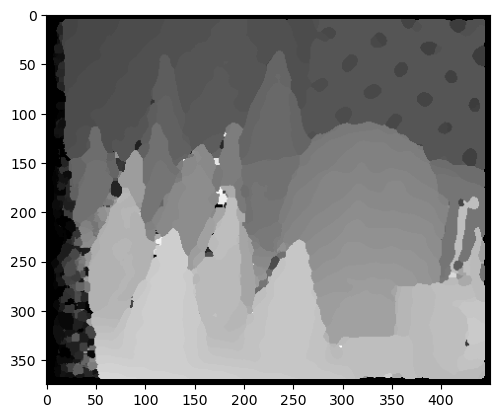

In [488]:
import imageio
scaled_array = np.interp(disp_blurred, (0, np.max(disp_blurred)), (0, 255)).astype(np.uint8)
# scaled_array = disp_blurred
imageio.imwrite('disp_test.png', scaled_array)
plt.imshow(scaled_array, cmap="gray")

In [490]:
!python ../evaldisp.py ../cones/disp2.png ../cones/occl.png disp_test.png

Traceback (most recent call last):
  File "../evaldisp.py", line 84, in <module>
    main(sys.argv[1], sys.argv[2], sys.argv[3])
  File "../evaldisp.py", line 66, in main
    disp = io.imread(fdisp)
  File "/home/romain/anaconda3/envs/stereo/lib/python3.8/site-packages/skimage/io/_io.py", line 53, in imread
    img = call_plugin('imread', fname, plugin=plugin, **plugin_args)
  File "/home/romain/anaconda3/envs/stereo/lib/python3.8/site-packages/skimage/io/manage_plugins.py", line 207, in call_plugin
    return func(*args, **kwargs)
  File "/home/romain/anaconda3/envs/stereo/lib/python3.8/site-packages/skimage/io/_plugins/imageio_plugin.py", line 15, in imread
    return np.asarray(imageio_imread(*args, **kwargs))
  File "/home/romain/anaconda3/envs/stereo/lib/python3.8/site-packages/imageio/v2.py", line 226, in imread
    with imopen(uri, "ri", **imopen_args) as file:
  File "/home/romain/anaconda3/envs/stereo/lib/python3.8/site-packages/imageio/core/imopen.py", line 113, in imopen
   